In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.ticker import FuncFormatter # 범례 텍스트 수정을 위한 라이브러리
import os # 현재 작업 디렉토리 확인을 위한 라이브러리
import numpy as np

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

print("Setup Complete")

Setup Complete


In [67]:
# 현재 작업 디렉토리 확인
current_directory = os.getcwd()

# 파일의 상대 경로 지정
meta_filepath = os.path.join(current_directory, 'all', './hs_meta.csv')

# 데이터 불러오기
meta_data = pd.read_csv(meta_filepath)

# 'Winrate' 열에서 퍼센트 기호 제거하고 숫자로 변환
meta_data['Winrate'] = meta_data['Winrate'].str.rstrip('%').astype('float')

# 'Popular' 열에서 퍼센트 기호 제거하고 숫자로 변환
meta_data['Popular'] = meta_data['Popular'].str.rstrip('%').astype('float')

# 'Games' 열에서 쉼표 제거하고 숫자로 변환
meta_data['Games'] = meta_data['Games'].str.replace(',', '').astype('int')

# 데이터 헤드 출력
meta_data.head()

,Hero,Deck,Winrate,Popular,Games
0,죽음의 기사,Plague Death Knight,55.9,6.8,120000
1,죽음의 기사,부정 죽음의 기사,39.6,3.8,68000
2,죽음의 기사,혈기 죽음의 기사,40.9,2.2,40000
3,죽음의 기사,냉기 죽음의 기사,48.1,1.0,18000
4,죽음의 기사,Rainbow Death Knight,48.3,0.6,11000


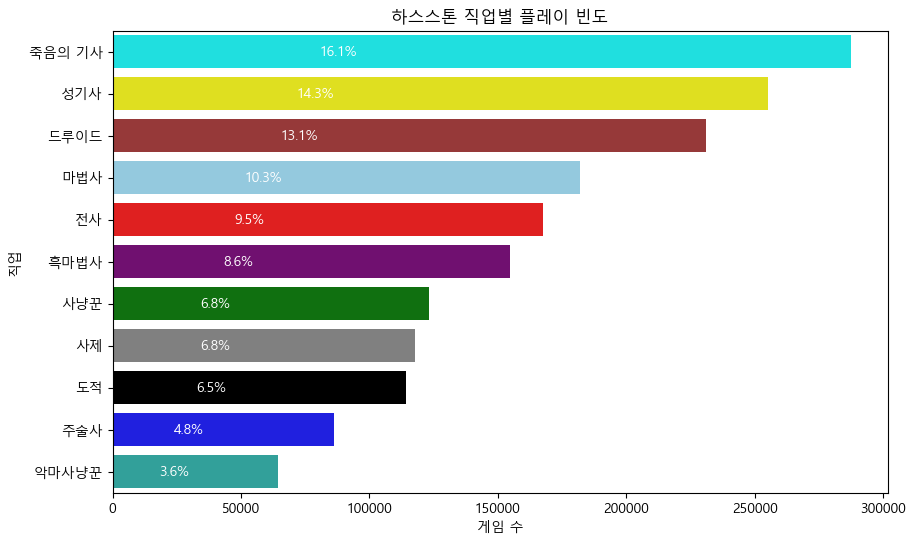

In [68]:
# 직업별 게임 플레이 빈도 계산
hero_total = meta_data.groupby(['Hero'])[['Popular','Games']].sum().reset_index()

# 게임 수가 많은 순으로 정렬
hero_total = hero_total.sort_values(by='Games', ascending=False)

# 직업별 색깔 지정
hero_color = {
    '죽음의 기사': 'cyan',
    '성기사': 'yellow',
    '드루이드': 'brown',
    '마법사': 'skyblue',
    '전사': 'red',
    '흑마법사': 'purple',
    '사냥꾼': 'green',
    '사제': 'gray',
    '도적': 'black', 
    '주술사': 'blue',   
    '악마사냥꾼' : 'lightseagreen'
}

# Seaborn을 사용하여 막대 그래프 그리기
plt.figure(figsize=(10, 6))
hero_graph = sns.barplot(x='Games', y='Hero', data=hero_total, palette=hero_color.values())
plt.title("하스스톤 직업별 플레이 빈도")
plt.xlabel("게임 수")
plt.ylabel("직업")

# 각 막대 안에 점유율을 표시
for index, value in enumerate(hero_total['Popular']):
    hero_graph.text(value * 5000, index, f'{value:.1f}%', va='center', fontsize=10, color='white')
plt.show()


In [69]:
# 직업별 총 점유율 계산
hero_popular_total = meta_data.groupby('Hero')['Popular'].sum().reset_index()

# 총 점유율이 큰 순서로 직업 정렬
hero_popular_total = hero_popular_total.sort_values(by='Popular', ascending=True)

# 직업 순서를 기준으로 hero 열을 categorical 변수로 변환
hero_order = hero_popular_total['Hero'].tolist()
meta_data['Hero'] = pd.Categorical(meta_data['Hero'], categories=hero_order, ordered=True)

# 정렬된 직업 순서를 기준으로 원본 데이터프레임 정렬
deck_total = meta_data.sort_values(by=['Hero', 'Popular'], ascending=[True, False])

# '기타'가 포함된 경우 뒤에 직업 이름 추가하여 '덱' 수정
deck_total['Deck'] = deck_total.apply(lambda row: f"{row['Deck']} {row['Hero']}" if '기타' in row['Deck'] else row['Deck'], axis=1)

# 결과 확인
deck_total.head()

,Hero,Deck,Winrate,Popular,Games
7,악마사냥꾼,어그로 악마사냥꾼,56.0,2.5,45000
11,악마사냥꾼,기타 악마사냥꾼,24.3,0.4,7100
8,악마사냥꾼,빅 악마사냥꾼,36.5,0.3,5100
9,악마사냥꾼,하이랜더 악마사냥꾼,43.0,0.2,4000
10,악마사냥꾼,유물 악마사냥꾼,38.8,0.2,3400


In [70]:
# 각 덱에 대한 유사한 색깔 지정
deck_colors = {
    'Plague Death Knight': 'darkslategray',
    '부정 죽음의 기사': 'teal',
    '혈기 죽음의 기사': 'darkcyan',
    '냉기 죽음의 기사': 'cadetblue',
    'Rainbow Death Knight': 'cyan',
    'Highlander Blood Death Knight': 'lightcyan',
    '기타 죽음의 기사': 'crimson',
    '어그로 악마사냥꾼': 'lightseagreen',
    '빅 악마사냥꾼': 'turquoise',
    '하이랜더 악마사냥꾼': 'aquamarine',
    '유물 악마사냥꾼': 'lime',
    '기타 악마사냥꾼': 'crimson',
    '용 드루이드': 'saddlebrown',
    '하이랜더 드루이드': 'brown',
    '나무정령 드루이드': 'chocolate',
    '기타 드루이드': 'crimson',
    '사냥개 사냥꾼': 'olive',
    '비전 사냥꾼': 'yellowgreen',
    '하이랜더 사냥꾼': 'green',
    '기타 사냥꾼': 'crimson',
    'Rainbow Mage': 'steelblue',
    'Mining Mage': 'dodgerblue',
    '비밀 마법사': 'deepskyblue',
    'Spooky Mage': 'skyblue',
    '정령 마법사': 'lightskyblue',
    '하이랜더 마법사': 'lightblue',
    'Lightshow Mage': 'cadetblue',
    '기계 마법사': 'aqua',
    '기타 마법사': 'crimson',
    '어그로 성기사': 'darkgoldenrod',
    'Showdown Paladin': 'goldenrod',
    '하이랜더 성기사': 'yellow',
    '신병 성기사': 'orange',
    'Earthen Paladin': 'khaki',
    '기타 성기사': 'crimson',
    '컨트롤 사제': 'dimgray',
    '언데드 사제': 'gray',
    '하이랜더 사제': 'darkgray',
    'Automaton Priest': 'slategray',
    'Ogre Priest': 'lightcyan',
    '기타 사제': 'crimson',
    'Mining Rogue': 'black',
    'Wishing Rogue': 'dimgray',
    'Ogre Rogue': 'gray',
    'Mech Rogue': 'darkgray',
    'Big Rogue': 'silver',
    '미라클 도적': 'lightgray',
    '비밀 도적': 'thistle',
    '기타 도적': 'crimson',
    '하이랜더 주술사': 'blue',
    '토템 주술사': 'blue',
    '정령 주술사': 'skyblue',
    '자연 주술사': 'darkblue',
    '기타 주술사': 'crimson',
    'Mining Warlock': 'indigo',
    '타디우스 흑마법사': 'darkviolet',
    '저주 흑마법사': 'purple',
    'Sludge Warlock': 'violet',
    '하이랜더 흑마법사': 'plum',
    '기타 흑마법사': 'crimson',
    '컨트롤 전사': 'coral',
    '격노 전사': 'red',
    '도발 전사': 'darkred',
    '하이랜더 전사': 'brown',
    "Rock 'n' Roll Warrior": 'salmon',
    '기타 전사': 'crimson',
}

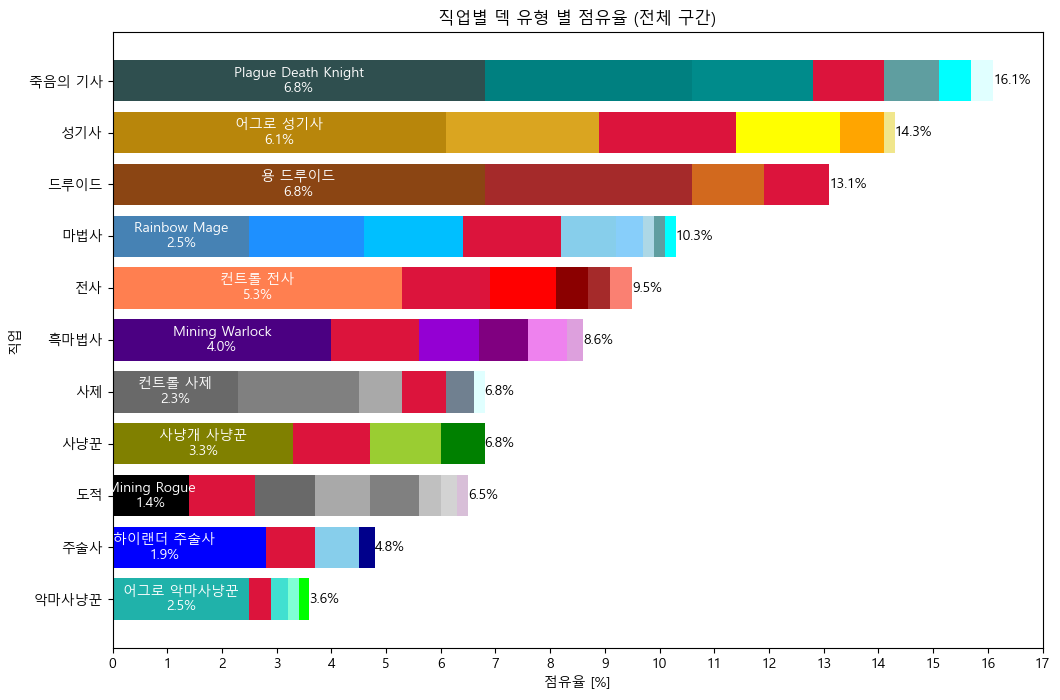

In [71]:
# 직업별로 덱 유형의 점유율을 누적으로 변환
deck_total['Cumulative_Popular'] = deck_total.groupby(['Hero'])['Popular'].cumsum()

# Seaborn을 사용하여 누적 막대 그래프 그리기
plt.figure(figsize=(12, 8))

# 각 덱에 대해 누적 막대 그래프 그리기
for i, deck in enumerate(deck_total['Deck'].unique()):
    # 현재 덱에 대한 데이터 추출
    current_deck_data = deck_total[deck_total['Deck'] == deck]

    # 막대 그래프 그리기
    plt.barh(
        current_deck_data['Hero'],
        current_deck_data['Popular'],
        label=deck,
        color=deck_colors[deck],
        left=current_deck_data['Cumulative_Popular'] - current_deck_data['Popular']
    )

#직업별 가장 높은 점유율을 가진 덱 정보 가져오기
max_popular_row = deck_total.groupby('Hero').apply(lambda x: x.loc[x['Popular'].idxmax()])
total_popular_row = deck_total.groupby('Hero').apply(lambda x: x.loc[x['Cumulative_Popular'].idxmax()])

# 직업별로 가장 높은 점유율을 가진 덱 정보에 대한 범례 추가
for index, row in max_popular_row.iterrows():
    plt.text(row['Cumulative_Popular']/2, row['Hero'],
             f"{row['Deck']}\n{row['Popular']:.1f}%",
             color='white', ha='center', va='center')

# 직업별로 총 점유율 정보에 대한 범례 추가
for index, row in total_popular_row.iterrows():
    plt.text(row['Cumulative_Popular'], row['Hero'],
             f"{row['Cumulative_Popular']:.1f}%",
             color='black', ha='left', va='center')

plt.xticks(range(0, 18))
plt.title("직업별 덱 유형 별 점유율 (전체 구간)")
plt.xlabel("점유율 [%]")
plt.ylabel("직업")
plt.legend().set_visible(False)

plt.show()

In [72]:
# 현재 작업 디렉토리 확인
current_directory = os.getcwd()

# 파일의 상대 경로 지정
matchup_filepath = os.path.join(current_directory, 'all', './hs_matchups.csv')

# 데이터 불러오기
matchup_data = pd.read_csv(matchup_filepath, index_col=0)

def convert_to_numeric(value):
    # '%' 제거 후 숫자로 변환, 에러가 발생하면 NaN 반환
    try:
        return float(value.rstrip('%'))
    except ValueError:
        return float('nan')

# '%'로 끝나는 열에 대해 함수 적용
matchup_data = matchup_data.applymap(convert_to_numeric)
matchup_data.head()

,Plague Death Knight,용 드루이드,어그로 성기사,컨트롤 전사,Mining Warlock,하이랜더 드루이드,부정 죽음의 기사,사냥개 사냥꾼,Showdown Paladin,Rainbow Mage,어그로 악마사냥꾼,Unnamed: 12,컨트롤 사제,혈기 죽음의 기사
Plague Death Knight,NaN,40.65,37.11,56.93,46.41,60.74,63.51,39.98,39.25,48.14,50.34,61.51,65.69,64.65
용 드루이드,59.34,NaN,30.89,58.24,56.85,49.89,76.40,51.31,30.45,60.21,61.13,63.49,54.78,72.01
어그로 성기사,62.88,69.10,NaN,68.44,62.75,73.90,65.12,63.59,44.39,56.19,49.54,73.12,72.27,74.70
컨트롤 전사,43.06,41.75,31.55,NaN,35.88,35.59,64.31,44.06,42.62,51.73,48.79,59.66,60.37,69.63
Mining Warlock,53.58,43.14,37.24,64.11,NaN,43.73,65.35,45.22,44.73,51.66,43.65,66.15,62.51,70.01


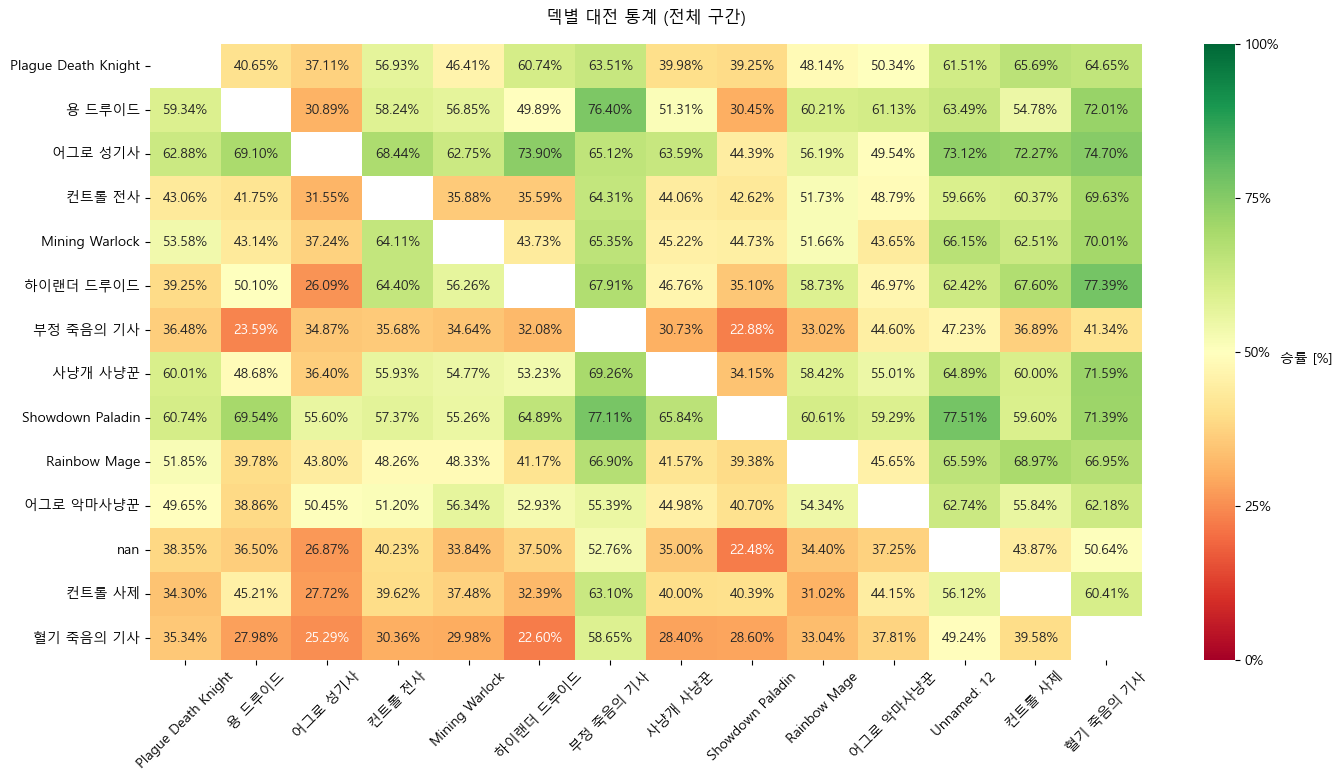

In [73]:
# 셀의 크기 조절
plt.figure(figsize=(16, 8)) 

heatmap = sns.heatmap(data=matchup_data, annot=True, fmt='.2f', cmap='RdYlGn', vmin=0, vmax=100, annot_kws={"size": 10})

# 각 텍스트 레이블에 퍼센트 추가
for text in heatmap.texts:
    text.set_text(f"{text.get_text()}%")

# 오른쪽 범례에 각 숫자에 '%' 추가
cbar = heatmap.collections[0].colorbar
cbar.set_label('승률 [%]', rotation=0, labelpad=20)
# FuncFormatter를 사용하여 범례 각 숫자에 '%' 추가
cbar.set_ticks([0, 25, 50, 75, 100])
cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
cbar.formatter = FuncFormatter(lambda x, pos: f"{int(x)}%")
cbar.update_ticks()


plt.title("덱별 대전 통계 (전체 구간)", pad=15)
plt.xticks(rotation=45)
plt.show()

In [74]:
# 현재 작업 디렉토리 확인
current_directory = os.getcwd()

# 파일의 상대 경로 지정
ap_filepath = os.path.join(current_directory, 'all', './hs_meta-AP.csv')
eu_filepath = os.path.join(current_directory, 'all', './hs_meta-EU.csv')
us_filepath = os.path.join(current_directory, 'all', './hs_meta-US.csv')

# 데이터 불러오기
ap_data = pd.read_csv(ap_filepath)
eu_data = pd.read_csv(eu_filepath)
us_data = pd.read_csv(us_filepath)

# 'Winrate' 열에서 퍼센트 기호 제거하고 숫자로 변환
ap_data['Winrate'] = ap_data['Winrate'].str.rstrip('%').astype('float')
eu_data['Winrate'] = eu_data['Winrate'].str.rstrip('%').astype('float')
us_data['Winrate'] = us_data['Winrate'].str.rstrip('%').astype('float')

# 'Popular' 열에서 퍼센트 기호 제거하고 숫자로 변환
ap_data['Popular'] = ap_data['Popular'].str.rstrip('%').astype('float')
eu_data['Popular'] = eu_data['Popular'].str.rstrip('%').astype('float')
us_data['Popular'] = us_data['Popular'].str.rstrip('%').astype('float')

# 'Games' 열에서 쉼표 제거하고 숫자로 변환
ap_data['Games'] = ap_data['Games'].str.replace(',', '').astype('int')
eu_data['Games'] = eu_data['Games'].str.replace(',', '').astype('int')
us_data['Games'] = us_data['Games'].str.replace(',', '').astype('int')

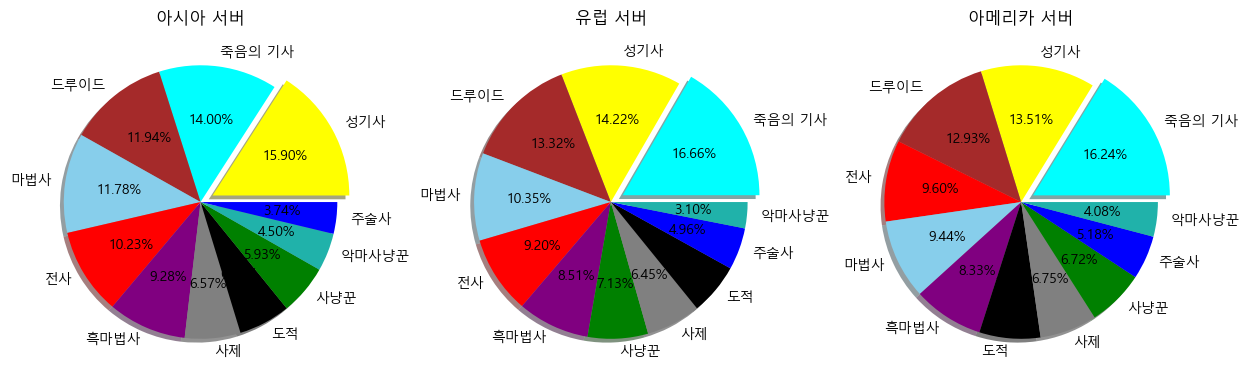

In [75]:
# 직업별 게임 플레이 빈도 계산
ap_total = ap_data.groupby(['Hero'])[['Popular','Games']].sum().reset_index()
eu_total = eu_data.groupby(['Hero'])[['Popular','Games']].sum().reset_index()
us_total = us_data.groupby(['Hero'])[['Popular','Games']].sum().reset_index()

# 게임 수가 많은 순으로 정렬
ap_total = ap_total.sort_values(by='Games', ascending=False)
eu_total = eu_total.sort_values(by='Games', ascending=False)
us_total = us_total.sort_values(by='Games', ascending=False)

# 직업별 색깔 지정
hero_color = {
    '죽음의 기사': 'cyan',
    '성기사': 'yellow',
    '드루이드': 'brown',
    '마법사': 'skyblue',
    '전사': 'red',
    '흑마법사': 'purple',
    '사냥꾼': 'green',
    '사제': 'gray',
    '도적': 'black', 
    '주술사': 'blue',   
    '악마사냥꾼' : 'lightseagreen'
}
wedgeprops={'width':1,'edgecolor':'k','linewidth':0} # 부채꼴 스타일
explode = (0.1,0,0,0,0,0,0,0,0,0,0) # 중심 벗어나는 정도

# 서버별 데이터 합치기
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, (server, server_total) in enumerate(zip(['아시아', '유럽', '아메리카'], [ap_total, eu_total, us_total])):
    # 직업별 색깔 가져오기
    colors = server_total['Hero'].map(hero_color)

    # 파이 차트 그리기
    axes[i].pie(
        server_total['Games'],
        labels=server_total['Hero'],
        autopct=lambda p: f'{p:.2f}%' if p > 0 else '',
        explode = explode,
        colors=colors,
        wedgeprops=wedgeprops,
        startangle=0,
        shadow=True,
        textprops={'color': 'black'}  # 퍼센트 텍스트의 색상을 설정
    )
    axes[i].set_title(f'{server} 서버')

plt.show()

In [102]:
# 현재 작업 디렉토리 확인
current_directory = os.getcwd()

# 파일의 상대 경로 지정
day24_filepath = os.path.join(current_directory, 'day', './hs_meta_1124.csv')
day25_filepath = os.path.join(current_directory, 'day', './hs_meta_1125.csv')
day26_filepath = os.path.join(current_directory, 'day', './hs_meta_1126.csv')
day27_filepath = os.path.join(current_directory, 'day', './hs_meta_1127.csv')
day28_filepath = os.path.join(current_directory, 'day', './hs_meta_1128.csv')

# 데이터 불러오기
day24_data = pd.read_csv(day24_filepath)
day25_data = pd.read_csv(day25_filepath)
day26_data = pd.read_csv(day26_filepath)
day27_data = pd.read_csv(day27_filepath)
day28_data = pd.read_csv(day28_filepath)

# 'Winrate' 열에서 퍼센트 기호 제거하고 숫자로 변환
day24_data['Winrate'] = day24_data['Winrate'].str.rstrip('%').astype('float')
day25_data['Winrate'] = day25_data['Winrate'].str.rstrip('%').astype('float')
day26_data['Winrate'] = day26_data['Winrate'].str.rstrip('%').astype('float')
day27_data['Winrate'] = day27_data['Winrate'].str.rstrip('%').astype('float')
day28_data['Winrate'] = day28_data['Winrate'].str.rstrip('%').astype('float')

# 'Popular' 열에서 퍼센트 기호 제거하고 숫자로 변환
day24_data['Popular'] = day24_data['Popular'].str.rstrip('%').astype('float')
day25_data['Popular'] = day25_data['Popular'].str.rstrip('%').astype('float')
day26_data['Popular'] = day26_data['Popular'].str.rstrip('%').astype('float')
day27_data['Popular'] = day27_data['Popular'].str.rstrip('%').astype('float')
day28_data['Popular'] = day28_data['Popular'].str.rstrip('%').astype('float')

# 'Games' 열에서 쉼표 제거하고 숫자로 변환
day24_data['Games'] = day24_data['Games'].str.replace(',', '').astype('int')
day25_data['Games'] = day25_data['Games'].str.replace(',', '').astype('int')
day26_data['Games'] = day26_data['Games'].str.replace(',', '').astype('int')
day27_data['Games'] = day27_data['Games'].str.replace(',', '').astype('int')
day28_data['Games'] = day28_data['Games'].str.replace(',', '').astype('int')

file_date_mapping = {
    'day24_data': '24',
    'day25_data': '25',
    'day26_data': '26',
    'day27_data': '27',
    'day28_data': '28',
}

# 파일명을 기반으로 날짜 추가
for df_name, date in file_date_mapping.items():
    df = globals()[df_name]  # 변수 이름을 통해 데이터프레임에 접근
    df['Day'] = date

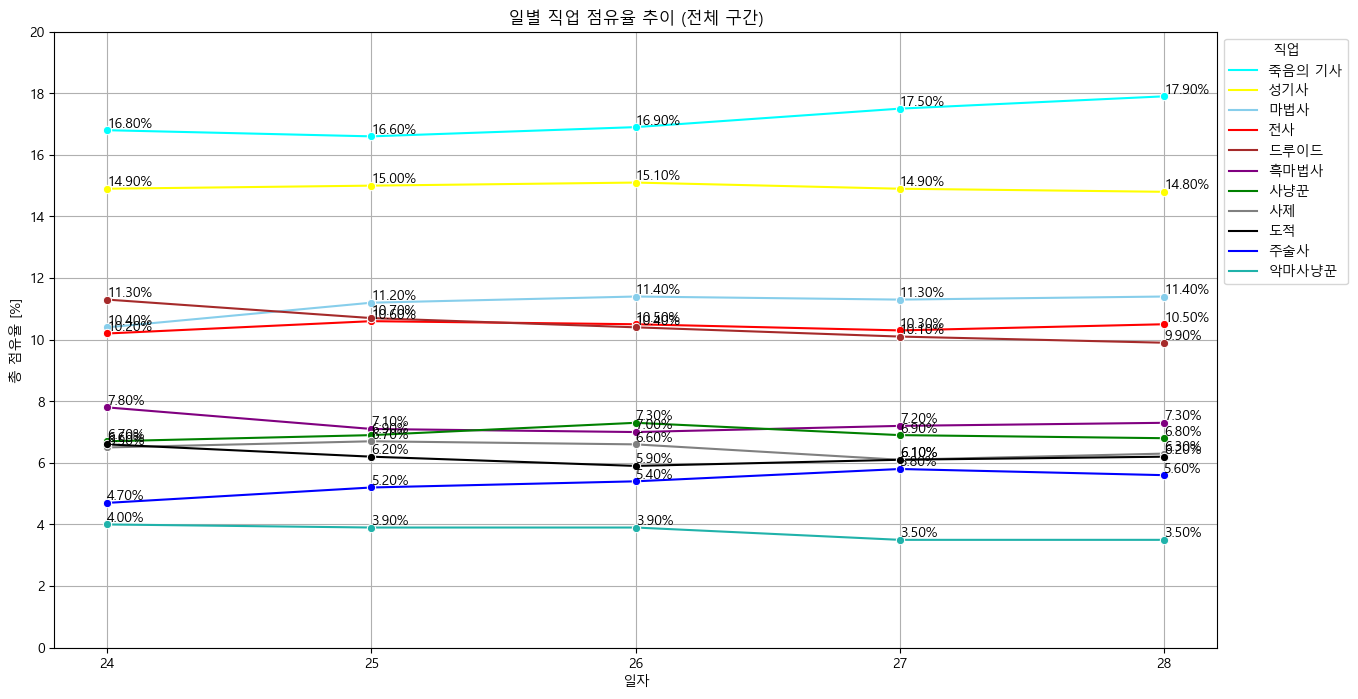

In [113]:
# 날짜별 데이터 합치기
all_days_data = pd.concat([day24_data, day25_data, day26_data, day27_data, day28_data])

# 날짜 및 직업별 Popular 합 구하기
daily_popular_by_hero = all_days_data.groupby(['Day', 'Hero'])[['Popular']].sum().reset_index()

# 직업별 색상 지정
hero_color = {
    '죽음의 기사': 'cyan',
    '성기사': 'yellow',
    '드루이드': 'brown',
    '마법사': 'skyblue',
    '전사': 'red',
    '흑마법사': 'purple',
    '사냥꾼': 'green',
    '사제': 'gray',
    '도적': 'black', 
    '주술사': 'blue',   
    '악마사냥꾼' : 'lightseagreen'
}

# 직업별 마지막 날짜 (28일)의 Popular 값에 따라 정렬
sorted_heroes = daily_popular_by_hero[daily_popular_by_hero['Day'] == '28'].sort_values(by='Popular', ascending=False)['Hero'].tolist()

# 시각화
plt.figure(figsize=(15, 8))
sns.lineplot(data=daily_popular_by_hero, x='Day', y='Popular', hue='Hero', marker='o', palette=hero_color, hue_order=sorted_heroes)

# 각 직업별 총 점유율 값을 선에 표시
for index, row in daily_popular_by_hero.iterrows():
    plt.text(row['Day'], row['Popular'], f"{row['Popular']:.2f}%", color='black', fontsize=10, ha='left', va='bottom')

plt.title('일별 직업 점유율 추이 (전체 구간)')
plt.xlabel('일자')
plt.ylabel('총 점유율 [%]')
plt.legend(title='직업', bbox_to_anchor=(1, 1), loc='upper left')

# y축 눈금 설정
plt.yticks(np.arange(0, 21, 2))
plt.grid(True)
plt.show()
